In [6]:
!pip install scipy
!pip install pandas
!pip install matplotlib
!pip install tqdm

import scipy.io
import pandas as pd

## EDA

In [7]:
mat_file = '../datasets/HaLT-SubjectA-160223-6St-LRHandLegTongue.mat'
mat = scipy.io.loadmat(mat_file, struct_as_record=True)
mat = {k:v for k, v in mat.items() if k[0] != '_'}

In [8]:
import numpy as np

content = mat['o']

# print(content)
print(content['marker'][0][0].shape)
# print(content['chnames'])
print(content['data'][0][0].shape)
headers = [header[0] for header in np.concatenate(content['chnames'][0][0]).ravel()]
print(len(headers))

df = pd.DataFrame(content['data'][0][0], columns=headers)
# Add markers column
df['Marker'] = content['marker'][0][0]

df.describe()


(667600, 1)
(667600, 22)
22


,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,Marker
count,667600.000000,667600.000000,667600.000000,667600.00000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,...,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000,667600.000000
mean,0.013370,0.009473,0.006346,0.00605,0.002721,-0.002448,-0.001642,-0.003339,-0.003775,-0.003315,...,0.017221,0.004666,0.000774,-0.001690,-0.002391,0.001947,0.001754,0.001562,-0.000057,7.747945
std,20.165716,17.601458,6.372136,6.33873,3.136998,3.147509,4.516797,4.995147,5.185552,5.378801,...,9.712346,6.142609,4.267011,5.840979,5.448110,6.656366,3.183400,4.518790,4.256118,23.615976
min,-215.370000,-191.110000,-105.560000,-82.09000,-69.190000,-82.100000,-66.330000,-83.370000,-57.110000,-199.970000,...,-220.050000,-184.060000,-101.500000,-108.600000,-100.670000,-133.500000,-45.140000,-67.360000,-219.780000,0.000000
25%,-7.670000,-7.020000,-3.390000,-3.42000,-1.830000,-1.830000,-2.720000,-2.880000,-3.120000,-2.960000,...,-4.470000,-3.410000,-2.360000,-3.130000,-3.170000,-3.520000,-1.930000,-2.620000,-0.220000,0.000000
50%,-0.890000,-0.820000,-0.240000,-0.26000,-0.000000,-0.000000,0.000000,0.020000,-0.010000,0.030000,...,-0.290000,0.030000,0.010000,0.040000,0.020000,-0.290000,-0.000000,0.020000,0.020000,0.000000
75%,4.870000,4.490000,2.880000,2.83000,1.830000,1.840000,2.710000,2.930000,3.120000,3.030000,...,3.770000,3.440000,2.360000,3.190000,3.210000,2.910000,1.920000,2.670000,0.250000,3.000000
max,477.480000,227.810000,199.770000,113.34000,125.960000,136.990000,148.300000,159.000000,70.880000,77.110000,...,349.440000,159.810000,156.420000,151.220000,143.970000,153.160000,109.650000,72.280000,527.080000,99.000000


In [9]:
df.head()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,Marker
0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0
4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0


<Axes: >

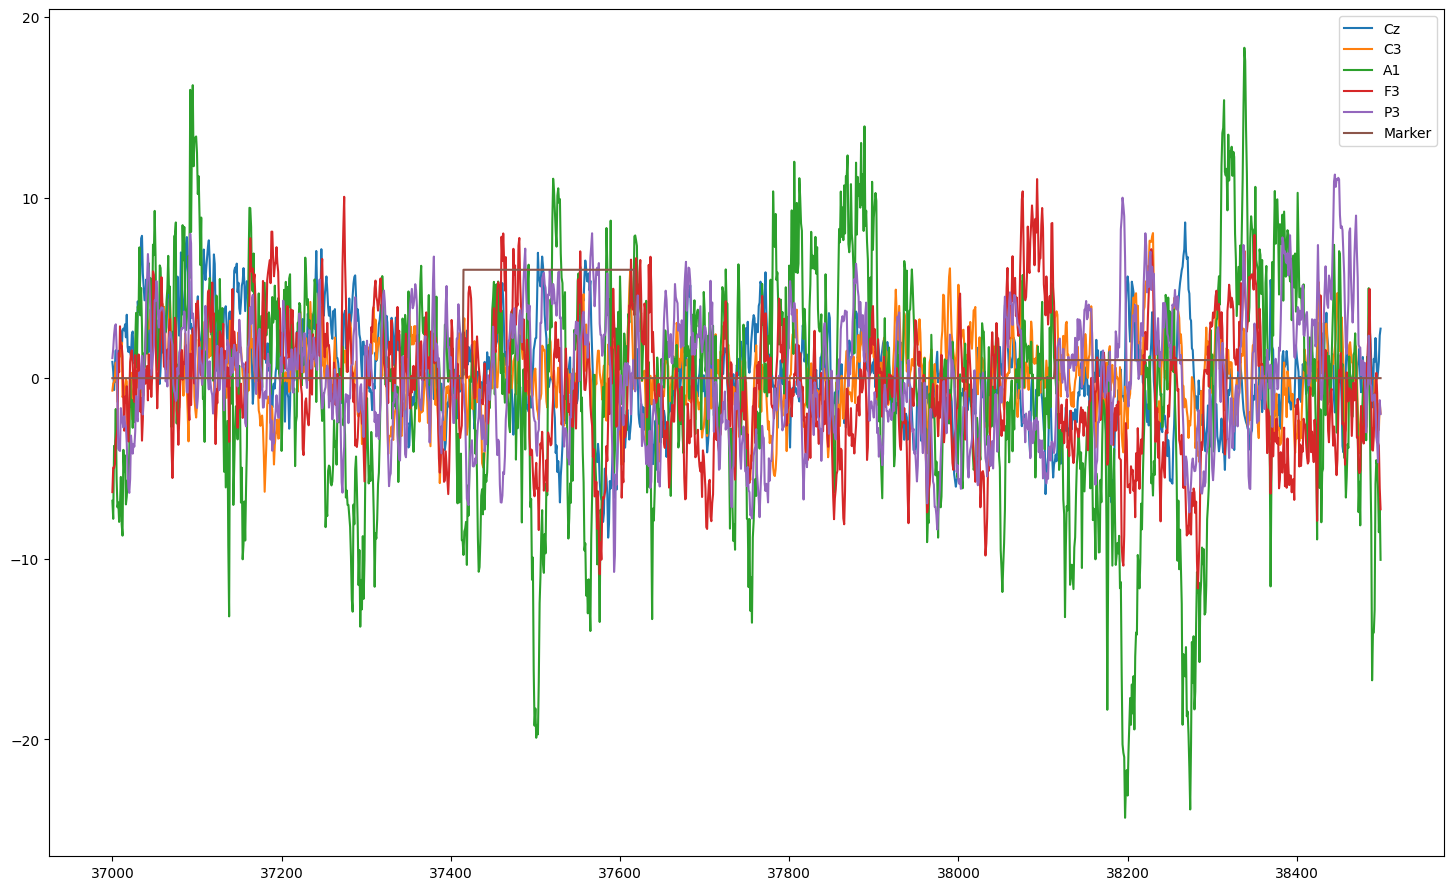

In [10]:
import matplotlib.pyplot as plt

df[['Cz', 'C3', 'A1', 'F3', 'P3', 'Marker']][37000:38500].plot(kind='line', figsize=(18,11))


## Building Neural Circuit Policy

In [11]:
!pip install seaborn ncps torch pytorch-lightning

In [12]:
import torch.nn as nn
from ncps.wirings import AutoNCP
from ncps.torch import LTC, CfC
import pytorch_lightning as pl
import torch
import torch.utils.data as data

In [13]:
# LightningModule for training a RNNSequence module
from typing import Any


class LiquidBlock(pl.LightningModule):
    def __init__(self, units=20, in_features=22, out_features=10, lr=0.005, weights=None):
        super().__init__()
        if weights:
            self.criterion = nn.CrossEntropyLoss(weight=weights)
        else:
            self.criterion = nn.CrossEntropyLoss()

        self.wiring = AutoNCP(units, out_features)
        self.cfc = CfC(in_features, self.wiring, batch_first=True)
        self.softmax = nn.Softmax(dim=1)
        
        self.lr = lr

    def forward(self, inputs) -> Any:
        x, hidden = self.cfc(inputs)
        return self.softmax(x), hidden

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat, hidden = self.forward(x)
        y_hat = y_hat.view_as(y)
        loss = self.criterion(y_hat, y)
        self.log("train_loss", loss, prog_bar=True)
        return {"loss": loss, "hiddens": hidden}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat, _ = self.forward(x)
        y_hat = y_hat.view_as(y)
        loss = self.criterion(y_hat, y)

        self.log("val_loss", loss, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        # Here we just reuse the validation_step for testing
        return self.validation_step(batch, batch_idx)

    def configure_optimizers(self):
        return torch.optim.Adam(self.cfc.parameters(), lr=self.lr)
    
    def draw_graph(self, **kwargs):
        return self.wiring.draw_graph(**kwargs)

In [14]:
# Lookup features
print(np.unique(df['Marker']))

_tensor = torch.Tensor(df['Marker'].values).int()
_tensor[_tensor==91] = 7
_tensor[_tensor==92] = 8
_tensor[_tensor==99] = 9

print(np.unique(_tensor))

_tensor_one_hot = torch.nn.functional.one_hot(_tensor.long())
print(_tensor_one_hot)
print(_tensor_one_hot.shape)

[ 0  1  2  3  4  5  6 91 92 99]
[0 1 2 3 4 5 6 7 8 9]
tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]])
torch.Size([667600, 10])


In [15]:

class_counts = df['Marker'].value_counts().sort_index()
total_examples = len(df['Marker'])

weights = torch.Tensor([total_examples/(class_count*len(class_counts)) for class_count in class_counts])

In [16]:
# Definition of the model:
out_features = 10
in_features = 22
learn_rate = 1e-5

EPOCHS = 10



model = LiquidBlock(units=30, in_features=in_features, out_features=out_features, lr=learn_rate)
trainer = pl.Trainer(
    accelerator='gpu',
    logger=pl.loggers.CSVLogger("log"),
    max_epochs=EPOCHS,
    gradient_clip_val=1,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


<Axes: >

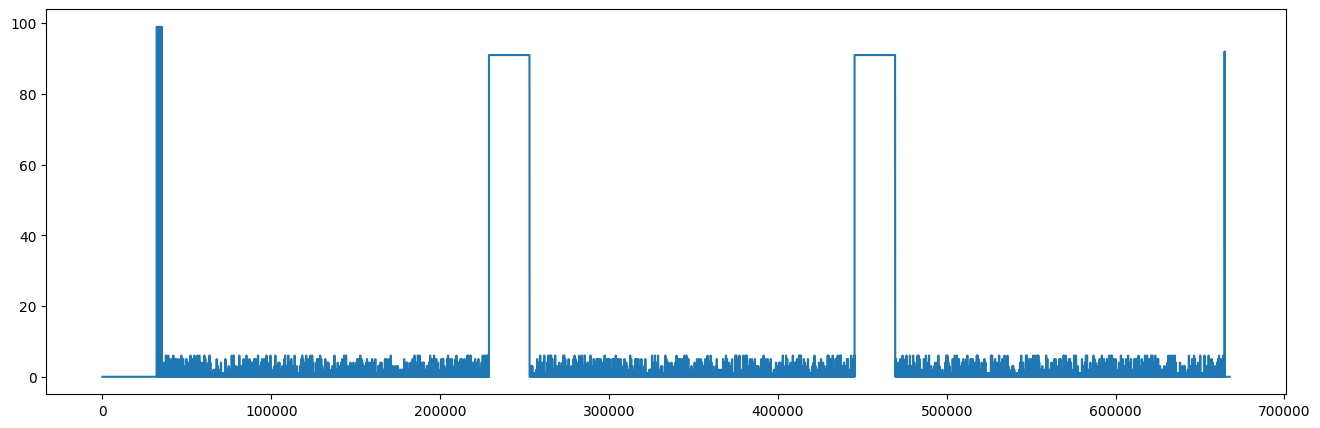

In [17]:
df['Marker'].plot(kind='line', figsize=(16, 5))

In [18]:
# Comprobación del nivel de balanceo de las clases
for cls, count in np.column_stack(np.unique(df['Marker'], return_counts=True)):
    print(f'Class {cls}: {count} samples.')

Class 0: 423032 samples.
Class 1: 33204 samples.
Class 2: 32194 samples.
Class 3: 32167 samples.
Class 4: 31787 samples.
Class 5: 34807 samples.
Class 6: 31158 samples.
Class 91: 48012 samples.
Class 92: 207 samples.
Class 99: 1032 samples.


# Topology of the NCP network

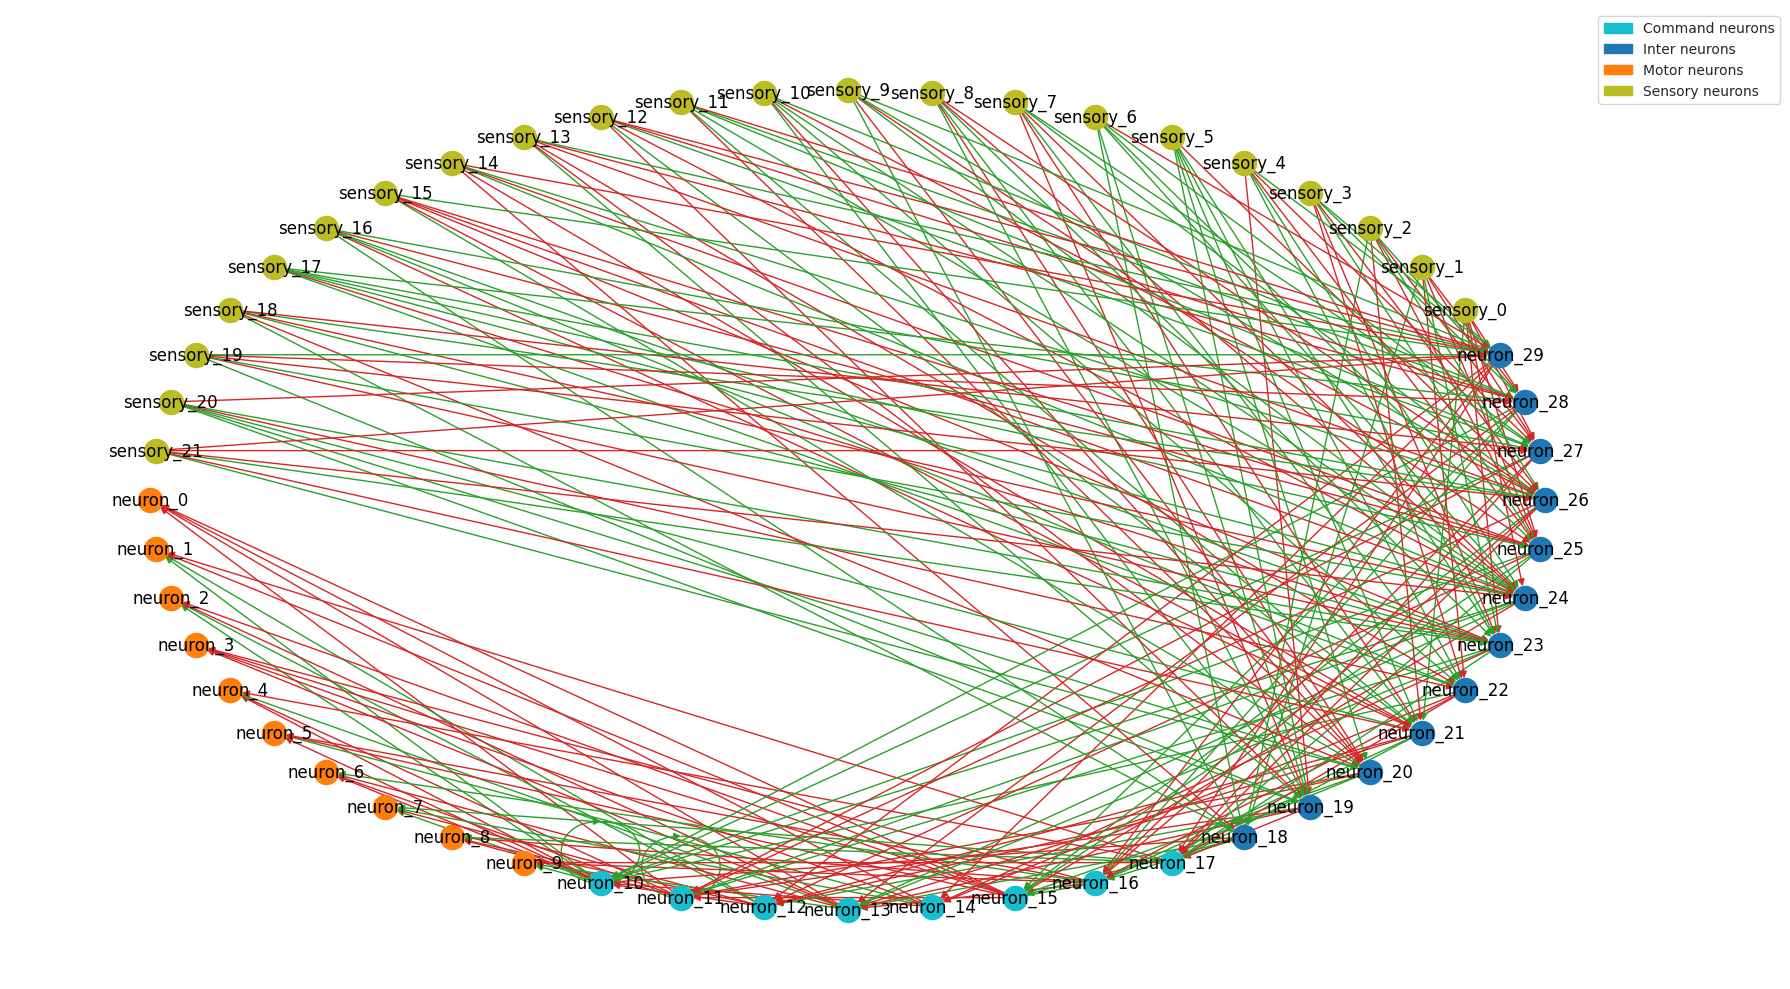

In [19]:
import seaborn as sns

sns.set_style("white")
plt.figure(figsize=(18, 10))
legend_handles = model.draw_graph(draw_labels=True, neuron_colors={"command": "tab:cyan"})
plt.legend(handles=legend_handles, loc="upper center", bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [20]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# Train the model
df_copy = df.copy(deep=True)
torch.set_float32_matmul_precision('medium')

# features = df_copy[['Cz', 'C3', 'A1', 'F3', 'P3']]
features = df_copy.loc[:, df.columns != 'Marker']
print(features.shape)

BATCH_SIZE = 10

# One hot encoding Marker
_tensor = torch.Tensor(df_copy['Marker'].values).int()
_tensor[_tensor==91] = 7
_tensor[_tensor==92] = 8
_tensor[_tensor==99] = 9

target_one_hot = torch.nn.functional.one_hot(_tensor.long(), 10).float()
# use 20% of training data for validation
train_set_size = int(len(df_copy) * 0.8)
valid_set_size = len(df_copy) - train_set_size

train_set = features[:][:train_set_size]
valid_set = features[:][train_set_size:]

train_data_y = target_one_hot.clone().detach()[:train_set_size]
validation_data_y = target_one_hot.clone().detach()[train_set_size:]

train_data_x = torch.tensor(train_set.values).float()
validation_data_x = torch.tensor(valid_set.values).float()

train_tensor = data.TensorDataset(train_data_x, train_data_y)
validation_tensor = data.TensorDataset(validation_data_x, validation_data_y)

train_loader = data.DataLoader(train_tensor, batch_size=BATCH_SIZE, num_workers=8)
validation_loader = data.DataLoader(validation_tensor, batch_size=BATCH_SIZE, num_workers=8)



(667600, 22)


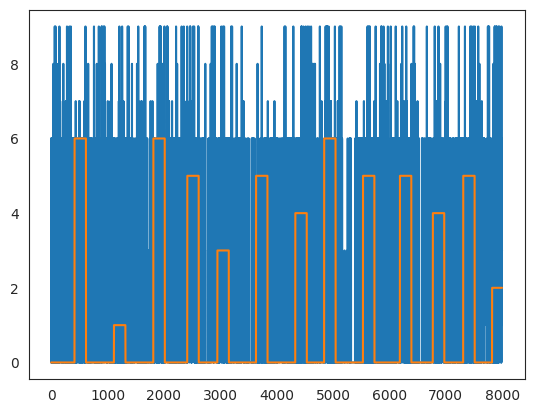

In [21]:
with torch.no_grad():
    prediction, _ = model(torch.tensor(df.loc[:, df.columns != 'Marker'][37000:45000].values).float())
class_pred = []
for one_hot in prediction:
    idx = torch.argmax(one_hot)
    class_pred.append(idx)

plt.plot(range(len(class_pred)), class_pred)
plt.plot(range(len(df['Marker'][37000:45000])), df['Marker'][37000:45000])

In [22]:
trainer.fit(model, train_loader, validation_loader)

Missing logger folder: log/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | criterion | CrossEntropyLoss | 0     
1 | cfc       | CfC              | 3.9 K 
2 | softmax   | Softmax          | 0     
-----------------------------------------------
3.1 K     Trainable params
748       Non-trainable params
3.9 K     Total params
0.015     Total estimated model params size (MB)


Epoch 0:   6%|▌         | 3275/53408 [01:04<16:27, 50.76it/s, v_num=0, train_loss=2.200]

/home/chema/Documents/MasterIA/TFM/code/liquid-eeg/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


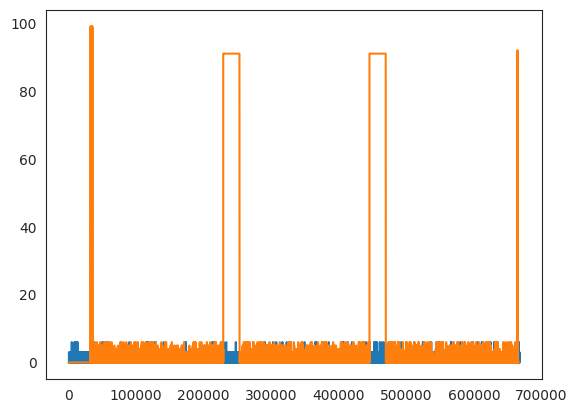

In [ ]:
with torch.no_grad():
    prediction, _ = model(torch.tensor(df.loc[:, df.columns != 'Marker'].values).float())
class_pred = []
for one_hot in prediction:
    idx = torch.argmax(one_hot)
    class_pred.append(idx)

plt.plot(range(len(class_pred)), class_pred)
plt.plot(range(len(df['Marker'])), df['Marker'])